In [ ]:
#@title Pip Installs
!pip install praw
!pip install textblob
!python -m textblob.download_corpora
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 5.3 MB/s eta 0:00:00
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


In [ ]:
#@title Imports
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from bs4 import BeautifulSoup
import praw
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import yfinance as yf

# Tickers
We are analyzing the stocks listed on the S&P 500. Initialize a list of tickers to iterate across.

In [ ]:
# Initialize tickers of S&P 500 stocks
tickers_text = 'MMM,AOS,ABT,ABBV,ACN,AYI,ADBE,AAP,AMD,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,AME,AMGN,APH,ADI,AON,APA,AIV,AAPL,AMAT,APTV,ADM,AJG,AIZ,T,ADSK,ADP,AZO,AVB,AVY,BAC,BAX,BBT,BDX,BBY,BIIB,BLK,HRB,BA,BWA,BXP,BSX,BHF,BMY,AVGO,CHRW,CA,CDNS,CPB,COF,CAH,KMX,CCL,CAT,CBOE,CNC,CNP,CF,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CME,CMS,KO,CTSH,CL,CMCSA,CMA,CAG,COP,ED,STZ,GLW,COST,COTY,CCI,CSX,CMI,CVS,DHI,DHR,DRI,DVA,DE,DAL,XRAY,DVN,DLR,DG,DLTR,D,DOV,DTE,DUK,DXC,EMN,ETN,EBAY,ECL,EIX,EW,EA,EMR,ETR,EOG,EQT,EFX,EQIX,EQR,ESS,EL,ES,EXC,EXPE,EXPD,EXR,XOM,FFIV,FAST,FRT,FDX,FIS,FITB,FE,FLS,FMC,FL,F,FTV,BEN,FCX,GRMN,IT,GD,GE,GIS,GM,GPC,GILD,GPN,GS,GT,GWW,HAL,HBI,HOG,HIG,HAS,HCA,HP,HSIC,HPE,HLT,HOLX,HD,HON,HRL,HST,HPQ,HUM,HBAN,HII,IDXX,INFO,ITW,ILMN,INCY,IR,INTC,ICE,IBM,IP,IPG,IFF,INTU,ISRG,IVZ,IQV,IRM,JBHT,SJM,JNJ,JCI,JPM,K,KEY,KMB,KIM,KMI,KLAC,KSS,KHC,KR,LB,LH,LRCX,LEG,LEN,LLY,LNC,LKQ,LMT,L,LOW,LYB,MTB,MAC,M,MPC,MAR,MMC,MLM,MAS,MA,MAT,MKC,MCD,MCK,MDT,MRK,MET,MTD,MGM,MCHP,MU,MSFT,MAA,MHK,TAP,MDLZ,MNST,MCO,MS,MSI,NDAQ,NOV,NAVI,NTAP,NFLX,NWL,NEM,NWSA,NWS,NEE,NKE,NI,NSC,NTRS,NOC,NCLH,NRG,NUE,NVDA,ORLY,OXY,OMC,OKE,ORCL,PCAR,PKG,PH,PAYX,PYPL,PNR,PEP,PRGO,PFE,PCG,PM,PSX,PNW,PNC,RL,PPG,PPL,PX,PFG,PG,PGR,PLD,PRU,PEG,PSA,PHM,PVH,QRVO,QCOM,PWR,DGX,RRC,RJF,O,REG,REGN,RF,RSG,RMD,RHI,ROK,ROP,ROST,RCL,SPGI,CRM,SBAC,SLB,STX,SEE,SRE,SHW,SIG,SPG,SWKS,SLG,SNA,SO,LUV,SWK,SBUX,STT,SYK,STI,SYF,SNPS,SYY,TROW,TPR,TGT,TEL,FTI,TXN,TXT,BK,CLX,COO,HSY,MOS,TRV,DIS,TMO,TJX,TSCO,TDG,TRIP,FOXA,FOX,TSN,USB,UDR,ULTA,UAA,UA,UNP,UAL,UNH,UPS,URI,UHS,UNM,VFC,VLO,VTR,VRSN,VRSK,VZ,VRTX,V,VNO,VMC,WMT,WBA,WM,WAT,WEC,WFC,WDC,WU,WY,WHR,WMB,WYNN,XEL,XRX,XYL,YUM,ZBH,ZION,ZTS'

# Convert into a list for ease of iterations
tickers = tickers_text.split(',')

# Pulling YFinance Data
Using the yfinance api, we can access information about any stock. Given this data, we pull relevant metrics and figures to make our analysis. Additionally, we extract price data and calculate moving averages. All of this information is stored in stock_data to be transformed into a stock_df data frame.

In [ ]:
# yfinance info

# Initialize data list
stock_data = []

# Iterate across all tickers and extract data
for ticker in tickers:

  # Attempt to pull data and provide an error code
  try:
    ticker_data = yf.Ticker(ticker)
    print(f'{ticker} data fetch successful')

    # Pull stock company info
    ticker_info = ticker_data.info
    name = ticker_info.get('shortName')
    current_price = ticker_info.get('currentPrice')
    sector = ticker_info.get('sector')
    market_cap = ticker_info.get('marketCap')
    roe = ticker_info.get('returnOnEquity')
    roa = ticker_info.get('returnOnAssets')

    # Make ROE and ROA percentages
    roe = roe * 100 if roe is not None else None
    roa = roa * 100 if roa is not None else None

    # Moving Average Calculator

    # Pull historical prices
    prices = yf.Ticker(ticker).history(period = "1y")['Close']

    # Calculate moving averages
    short_term_ma = prices.rolling(window=30).mean()
    long_term_ma = prices.rolling(window=90).mean()

    # Find current moving average values
    current_short_ma = short_term_ma.iloc[-1]
    current_long_ma = long_term_ma.iloc[-1]

    # Calculate the MA Momentum
    ma_momentum = ((current_short_ma - current_long_ma)/current_long_ma) * 100

    # Append data to list
    stock_data.append({
      'Ticker': ticker,
      'Name': name,
      'Current Price': current_price,
      'Sector': sector,
      'Market Cap': market_cap,
      'ROE': roe,
      'ROA': roa,
      'Ticker': ticker,
      'Current Short MA': current_short_ma,
      'Current Long MA' :  current_long_ma,
      'MA Momentum' : ma_momentum,
      'Prices': prices,
      'Short Term MA': short_term_ma,
      'Long Term MA': long_term_ma,
    })
  except Exception as e:
    print(f'Error: exception {e}')

MMM data fetch successful
AOS data fetch successful
ABT data fetch successful
ABBV data fetch successful
ACN data fetch successful
AYI data fetch successful
ADBE data fetch successful
AAP data fetch successful
AMD data fetch successful
AES data fetch successful
AMG data fetch successful
AFL data fetch successful
A data fetch successful
APD data fetch successful
AKAM data fetch successful
ALK data fetch successful
ALB data fetch successful
ARE data fetch successful
ALGN data fetch successful
ALLE data fetch successful
LNT data fetch successful
ALL data fetch successful
GOOGL data fetch successful
GOOG data fetch successful
MO data fetch successful
AMZN data fetch successful
AEE data fetch successful
AAL data fetch successful
AEP data fetch successful
AXP data fetch successful
AIG data fetch successful
AMT data fetch successful
AWK data fetch successful
AMP data fetch successful
AME data fetch successful
AMGN data fetch successful
APH data fetch successful
ADI data fetch successful
AON d

In [ ]:
# Convert data to DataFrame
stock_df = pd.DataFrame(stock_data)

# Set index to ticker
stock_df = stock_df.set_index('Ticker')
stock_df

,Name,Current Price,Sector,Market Cap,ROE,ROA,Current Short MA,Current Long MA,MA Momentum,Prices,Short Term MA,Long Term MA
Ticker,,,,,,,,,,,,
MMM,3M Company,169.360,Industrials,8.996828e+10,72.920996,7.971000,155.985000,153.615571,1.542441,Date 2024-10-23 00:00:00-04:00 125.412270 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...
AOS,A.O. Smith Corporation,68.530,Industrials,9.603080e+09,27.603000,13.332000,71.326333,70.348726,1.389659,Date 2024-10-23 00:00:00-04:00 75.810966 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...
ABT,Abbott Laboratories,127.420,Healthcare,2.217693e+11,NaN,NaN,131.998148,130.925577,0.819222,Date 2024-10-23 00:00:00-04:00 114.834091 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...
ABBV,AbbVie Inc.,227.990,Healthcare,4.027576e+11,112.853990,8.869001,225.725542,205.337901,9.928825,Date 2024-10-23 00:00:00-04:00 181.532593 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...
ACN,Accenture plc,247.650,Technology,1.535774e+11,25.509000,11.183000,242.716666,261.314426,-7.117005,Date 2024-10-23 00:00:00-04:00 365.412933 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...
...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,Xylem Inc.,147.225,Industrials,3.583599e+10,8.625000,4.586000,145.147835,138.889114,4.506272,Date 2024-10-23 00:00:00-04:00 130.168243 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...
YUM,"Yum! Brands, Inc.",146.060,Consumer Cyclical,4.053686e+10,NaN,24.150999,147.719333,146.305319,0.966482,Date 2024-10-23 00:00:00-04:00 131.460297 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...
ZBH,"Zimmer Biomet Holdings, Inc.",102.290,Healthcare,2.026324e+10,6.529000,4.359000,99.566826,98.218541,1.372740,Date 2024-10-23 00:00:00-04:00 103.718010 2...,Date 2024-10-23 00:00:00-04:00 NaN 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...


# Sentiment Analysis
Using Praw to scrape subreddits and Vader Sentiment to compute sentiment scores, we collect information about how many times a stock is mentioned and what is the average sentiment or opinion about a stock. This data is aggregated into a sentiment_df data frame.

In [ ]:
# Initialize Sentiment Intensity Analyzer from Vader Sentiment
analyzer = SentimentIntensityAnalyzer()

# Define function to get the sentiment of text
def get_sentiment(text):
    if not isinstance(text, str) or text.strip() == '':
        return 0
    return analyzer.polarity_scores(text)['compound']

# Define functon to average the sentiment of title and body text
def overall_sentiment(row):
    title_sent = row['title_sentiment']
    body_sent = row['body_sentiment']
    if title_sent != 0 and body_sent != 0:
        return (title_sent + body_sent) / 2
    else:
        return None

# Initialize list of subreddits to scrape and false tickers to exclude from sentiment analysis
subredditlist = ['wallstreetbets', 'stockmarket', 'stocks']
false_tickers = {'DD','IT','ALL','A','DAY','YOU','BE','ON','IN','FOR','GO','UP','SO','AI','AR','D','MGM','MFA','MA','PDT','S','T','AS','FT','IP','K', 'USA', 'M', 'B'}

all_frames = []

# Iterate across subreddits to scrape sentiment
for item in subredditlist:
    subscraper = praw.Reddit(
        client_id='xdpuZuV2hoBM9kQDBhNKNQ',
        client_secret='sSoQR5rsBFHvH6XtMwN7Oy0xSJiZRw',
        user_agent='sub-activity-check by u/Flaky-Pattern4439',
        check_for_async=False
    )
    sub = subscraper.subreddit(item)

    # Create a list of the top posts of the week from the subreddit
    posts = list(sub.top(time_filter='month', limit=500))
    # Empty list to append to
    postinfo = []
    # Iterate across top posts of the week and scrape post data
    for post in posts:
        postinfo.append({
            'title': post.title,
            'body': post.selftext,
            'permalink': f'https://www.reddit.com{post.permalink}',
        })

    # Create a dataframe of post data sorted by descending activity
    postsdf = pd.DataFrame(postinfo)
    # Running Vader sentiment analyzer on title and body text
    postsdf['title_sentiment'] = postsdf['title'].apply(get_sentiment)
    postsdf['body_sentiment']  = postsdf['body'].apply(get_sentiment)
    # Averaging sentiment of title and body
    postsdf['overall_sentiment'] = postsdf.apply(overall_sentiment, axis=1)

    # Dictionary of ticker mentions and sentiment_sum for every ticker that will be added to
    ticker_stats = {t: {'mentions': 0, 'sentiment_sum': 0.0} for t in tickers}

    # Iterates through rows in the posts dataframe
    for _, row in postsdf.iterrows():
        text = f" {row['title']} {row['body']} "
        sent = row['overall_sentiment']

        # Iterating through every ticker in the ticker list, adding 1 to mentions when a post mentions it, adding sentiment score to sentiment sum when available
        for ticker in tickers:
            if f' {ticker} ' in text or f' ${ticker} ' in text:
                ticker_stats[ticker]['mentions'] += 1
                if pd.notna(sent):
                    ticker_stats[ticker]['sentiment_sum'] += float(sent)

    # Iterates over every ticker and its stats in ticker_stats and appends to rows
    rows = []
    for ticker, stats in ticker_stats.items():
      if stats['mentions'] > 0:
            rows.append({'ticker': ticker,'mentions': stats['mentions'],'sentiment_sum': stats['sentiment_sum'],})

    # Converting rows to dataframe
    result_df = pd.DataFrame(rows, columns=['ticker','mentions','sentiment_sum'])

    # Removing false tickers
    clean_df = result_df[~result_df['ticker'].isin(false_tickers)].reset_index(drop=True)
    all_frames.append(clean_df)

# Merging all dataframes in all_frames into one frame
combined = pd.concat(all_frames, ignore_index=True)
# Summing total mentions and total sentiment
totals = (combined.groupby('ticker', as_index=False).agg(mentions=('mentions','sum'),sentiment_sum=('sentiment_sum','sum')))
# Calculating average sentiment by dividing total sentiment by total mentions
totals['avg_sentiment'] = totals['sentiment_sum'] / totals['mentions']
# Creating DataFrame of tickers, mentions, and average sentiment from totals, ordered by descending mentions and average sentiment
sentiment_df = (totals.sort_values(['mentions','avg_sentiment'], ascending=[False, False]).reset_index(drop=True)[['ticker','mentions','avg_sentiment']])

# Setting index of DataFrame to ticker name
sentiment_df.set_index('ticker', inplace=True)
sentiment_df

,mentions,avg_sentiment
ticker,,
AMD,34,0.057710
NVDA,9,0.325772
UNH,4,0.000000
GOOG,3,0.277950
PM,3,0.000000
ADP,3,-0.206550
AVGO,2,0.469150
DTE,2,0.464050
EA,2,0.271800


# Data Cleaning and Consolidation
Next, we join our two data frames, stock_df and sentiment_df, to consolidate all of our relevant information. This requires some cleanup in NaN values and column names. Finally, we compute Z-Score for relevant columns: ROE, ROA, momentum, mentions, and average sentiment.

In [ ]:
# Merge stock data and sentiment analyses
stock_df = stock_df.join(sentiment_df)
stock_df

,Name,Current Price,Sector,Market Cap,ROE,ROA,Current Short MA,Current Long MA,MA Momentum,Prices,Short Term MA,Long Term MA,mentions,avg_sentiment
Ticker,,,,,,,,,,,,,,
MMM,3M Company,169.360,Industrials,8.996828e+10,72.920996,7.971000,155.985000,153.615571,1.542441,Date 2024-10-23 00:00:00-04:00 125.412270 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,NaN,NaN
AOS,A.O. Smith Corporation,68.530,Industrials,9.603080e+09,27.603000,13.332000,71.326333,70.348726,1.389659,Date 2024-10-23 00:00:00-04:00 75.810966 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,NaN,NaN
ABT,Abbott Laboratories,127.420,Healthcare,2.217693e+11,NaN,NaN,131.998148,130.925577,0.819222,Date 2024-10-23 00:00:00-04:00 114.834091 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,NaN,NaN
ABBV,AbbVie Inc.,227.990,Healthcare,4.027576e+11,112.853990,8.869001,225.725542,205.337901,9.928825,Date 2024-10-23 00:00:00-04:00 181.532593 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,NaN,NaN
ACN,Accenture plc,247.650,Technology,1.535774e+11,25.509000,11.183000,242.716666,261.314426,-7.117005,Date 2024-10-23 00:00:00-04:00 365.412933 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,Xylem Inc.,147.225,Industrials,3.583599e+10,8.625000,4.586000,145.147835,138.889114,4.506272,Date 2024-10-23 00:00:00-04:00 130.168243 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,NaN,NaN
YUM,"Yum! Brands, Inc.",146.060,Consumer Cyclical,4.053686e+10,NaN,24.150999,147.719333,146.305319,0.966482,Date 2024-10-23 00:00:00-04:00 131.460297 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,NaN,NaN
ZBH,"Zimmer Biomet Holdings, Inc.",102.290,Healthcare,2.026324e+10,6.529000,4.359000,99.566826,98.218541,1.372740,Date 2024-10-23 00:00:00-04:00 103.718010 2...,Date 2024-10-23 00:00:00-04:00 NaN 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,NaN,NaN


In [ ]:
# Rename columns
stock_df.rename(columns = {'avg_sentiment':'Average Sentiment', 'mentions': 'Mentions'}, inplace = True)

# Fill NaN sentiments and return metrics for tickers with 0
stock_df['Mentions'] = stock_df['Mentions'].fillna(0)
stock_df['Average Sentiment'] = stock_df['Average Sentiment'].fillna(0)
stock_df['ROE'] = stock_df['ROE'].fillna(0)
stock_df['ROA'] = stock_df['ROA'].fillna(0)

# Normalize Data for ROE, ROA, MA Momentum, Mentions, and Sentiment
stock_df['ROE (Z-Score)'] = (stock_df['ROE'] - stock_df['ROE'].mean()) / stock_df['ROE'].std()
stock_df['ROA (Z-Score)'] = (stock_df['ROA'] - stock_df['ROA'].mean()) / stock_df['ROA'].std()
stock_df['MA Momentum (Z-Score)'] = (stock_df['MA Momentum'] - stock_df['MA Momentum'].mean()) / stock_df['MA Momentum'].std()
stock_df['Mentions (Z-Score)'] = (stock_df['Mentions'] - stock_df['Mentions'].mean()) / stock_df['Mentions'].std()
stock_df['Average Sentiment (Z-Score)'] = (stock_df['Average Sentiment'] - stock_df['Average Sentiment'].mean()) / stock_df['Average Sentiment'].std()

stock_df.sort_values('Mentions', ascending=False)

,Name,Current Price,Sector,Market Cap,ROE,ROA,Current Short MA,Current Long MA,MA Momentum,Prices,Short Term MA,Long Term MA,Mentions,Average Sentiment,ROE (Z-Score),ROA (Z-Score),MA Momentum (Z-Score),Mentions (Z-Score),Average Sentiment (Z-Score)
Ticker,,,,,,,,,,,,,,,,,,,
AMD,"Advanced Micro Devices, Inc.",233.59,Technology,3.790153e+11,4.699,2.190000,192.007003,169.235334,13.455623,Date 2024-10-23 00:00:00-04:00 152.910004 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,34.0,0.057710,-0.077341,-0.443868,1.662169,19.095498,0.815799
NVDA,NVIDIA Corporation,181.09,Technology,4.408998e+12,109.417,53.094000,181.817668,173.814616,4.604360,Date 2024-10-23 00:00:00-04:00 139.519989 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,9.0,0.325772,0.079825,5.629468,0.415976,4.969619,5.258220
UNH,UnitedHealth Group Incorporated,357.43,Healthcare,3.237149e+11,21.653,6.464000,353.018333,312.355767,13.018029,Date 2024-10-23 00:00:00-04:00 552.654419 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,4.0,0.000000,-0.051896,0.066061,1.600559,2.144443,-0.140597
PM,Philip Morris International Inc,157.29,Consumer Defensive,2.448359e+11,0.000,13.890000,158.968163,166.104956,-4.296557,Date 2024-10-23 00:00:00-04:00 126.676460 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,3.0,0.000000,-0.084394,0.952054,-0.837208,1.579408,-0.140597
GOOG,Alphabet Inc.,254.70,Communication Services,3.074696e+12,34.829,16.792000,248.758334,213.591574,16.464489,Date 2024-10-23 00:00:00-04:00 163.763245 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,3.0,0.277950,-0.032121,1.298291,2.085796,1.579408,4.465693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ESS,"Essex Property Trust, Inc.",264.08,Real Estate,1.823960e+10,15.120,2.947000,262.358833,267.662860,-1.981607,Date 2024-10-23 00:00:00-04:00 289.411255 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,0.0,0.000000,-0.061701,-0.353550,-0.511280,-0.115698,-0.140597
EQR,Equity Residential,63.47,Real Estate,2.497937e+10,9.082,2.622000,63.401848,64.544125,-1.769760,Date 2024-10-23 00:00:00-04:00 72.886597 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,0.0,0.000000,-0.070763,-0.392326,-0.481454,-0.115698,-0.140597
EQIX,"Equinix, Inc.",824.49,Real Estate,8.068787e+10,7.512,3.131000,797.744666,789.951250,0.986569,Date 2024-10-23 00:00:00-04:00 872.321472 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,0.0,0.000000,-0.073119,-0.331597,-0.093382,-0.115698,-0.140597


# Scoring
With key information about each stock, we weight the relative importance of each factor and combine the z-scores to develop a composite score that shows if a stock should be bought or sold. We show the top 3 and bottom 3 stocks.

In [ ]:
# Create a composite score for each stock

# Define relative weightings for the formula
sentiment_weight = 0.25
ma_momentum_weight = 0.5
roe_weight = 0.125
roa_weight = 0.125

# Combine into a composite rating score
stock_df['Composite Score'] = (
    (sentiment_weight * stock_df['Mentions (Z-Score)'] * stock_df['Average Sentiment (Z-Score)']) +
    (ma_momentum_weight * stock_df['MA Momentum (Z-Score)']) +
    (roe_weight * stock_df['ROE (Z-Score)']) +
    (roa_weight * stock_df['ROA (Z-Score)'])
    )

# Rearrange columns
stock_df = stock_df[[
    'Name', 'Composite Score', 'Sector', 'Market Cap',
    'ROE', 'ROA', 'Current Short MA',
    'Current Long MA', 'MA Momentum',
    'Mentions', 'Average Sentiment', 'Prices',
    'Short Term MA', 'Long Term MA', 'ROE (Z-Score)',
    'ROA (Z-Score)', 'MA Momentum (Z-Score)',
    'Mentions (Z-Score)', 'Average Sentiment (Z-Score)']].copy()

# Sort by score
stock_df.sort_values('Composite Score', ascending=False, inplace=True)
stock_df


,Name,Composite Score,Sector,Market Cap,ROE,ROA,Current Short MA,Current Long MA,MA Momentum,Mentions,Average Sentiment,Prices,Short Term MA,Long Term MA,ROE (Z-Score),ROA (Z-Score),MA Momentum (Z-Score),Mentions (Z-Score),Average Sentiment (Z-Score)
Ticker,,,,,,,,,,,,,,,,,,,
NVDA,NVIDIA Corporation,7.454487,Technology,4.408998e+12,109.417,53.094000,181.817668,173.814616,4.604360,9.0,0.325772,Date 2024-10-23 00:00:00-04:00 139.519989 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,0.079825,5.629468,0.415976,4.969619,5.258220
AMD,"Advanced Micro Devices, Inc.",4.660456,Technology,3.790153e+11,4.699,2.190000,192.007003,169.235334,13.455623,34.0,0.057710,Date 2024-10-23 00:00:00-04:00 152.910004 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,-0.077341,-0.443868,1.662169,19.095498,0.815799
HCA,"HCA Healthcare, Inc.",2.984718,Healthcare,1.032379e+11,13631.683,11.844000,419.336552,393.539742,6.555071,0.0,0.000000,Date 2024-10-23 00:00:00-04:00 406.720673 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,20.374777,0.707947,0.690622,-0.115698,-0.140597
GOOG,Alphabet Inc.,2.964457,Communication Services,3.074696e+12,34.829,16.792000,248.758334,213.591574,16.464489,3.0,0.277950,Date 2024-10-23 00:00:00-04:00 163.763245 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,-0.032121,1.298291,2.085796,1.579408,4.465693
AVGO,Broadcom Inc.,2.644432,Technology,1.630160e+12,27.083,8.895001,343.076772,308.637552,11.158467,2.0,0.469150,Date 2024-10-23 00:00:00-04:00 171.824768 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,-0.043746,0.356103,1.338747,1.014373,7.634329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UAA,"Under Armour, Inc.",-1.229095,Consumer Cyclical,2.050582e+09,5.502,2.809000,4.870333,5.734889,-15.075367,0.0,0.000000,Date 2024-10-23 00:00:00-04:00 8.56 2024-10...,Date 2024-10-23 00:00:00-04:00 NaN 202...,Date 2024-10-23 00:00:00-04:00 NaN 202...,-0.076136,-0.370015,-2.354786,-0.115698,-0.140597
KMX,CarMax Inc,-1.241288,Consumer Cyclical,6.308463e+09,8.418,1.864000,48.870000,57.532111,-15.056133,0.0,0.000000,Date 2024-10-23 00:00:00-04:00 72.000000 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,Date 2024-10-23 00:00:00-04:00 NaN 20...,-0.071760,-0.482763,-2.352078,-0.115698,-0.140597
GT,The Goodyear Tire & Rubber Comp,-1.332354,Consumer Cyclical,2.013738e+09,8.986,1.510000,7.592997,9.069110,-16.276275,0.0,0.000000,Date 2024-10-23 00:00:00-04:00 8.3100 2024-...,Date 2024-10-23 00:00:00-04:00 NaN 202...,Date 2024-10-23 00:00:00-04:00 NaN 202...,-0.070907,-0.524998,-2.523865,-0.115698,-0.140597


In [ ]:
# Show 3 Strongest Stocks
stock_df.head(3)

,Name,Composite Score,Sector,Market Cap,ROE,ROA,Current Short MA,Current Long MA,MA Momentum,Mentions,Average Sentiment,Prices,Short Term MA,Long Term MA,ROE (Z-Score),ROA (Z-Score),MA Momentum (Z-Score),Mentions (Z-Score),Average Sentiment (Z-Score)
Ticker,,,,,,,,,,,,,,,,,,,
NVDA,NVIDIA Corporation,7.454487,Technology,4.408998e+12,109.417,53.094,181.817668,173.814616,4.604360,9.0,0.325772,Date 2024-10-23 00:00:00-04:00 139.519989 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,0.079825,5.629468,0.415976,4.969619,5.258220
AMD,"Advanced Micro Devices, Inc.",4.660456,Technology,3.790153e+11,4.699,2.190,192.007003,169.235334,13.455623,34.0,0.057710,Date 2024-10-23 00:00:00-04:00 152.910004 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,-0.077341,-0.443868,1.662169,19.095498,0.815799
HCA,"HCA Healthcare, Inc.",2.984718,Healthcare,1.032379e+11,13631.683,11.844,419.336552,393.539742,6.555071,0.0,0.000000,Date 2024-10-23 00:00:00-04:00 406.720673 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,20.374777,0.707947,0.690622,-0.115698,-0.140597


In [ ]:
# Show 3 Weakest Stocks
stock_df.tail(3)

,Name,Composite Score,Sector,Market Cap,ROE,ROA,Current Short MA,Current Long MA,MA Momentum,Mentions,Average Sentiment,Prices,Short Term MA,Long Term MA,ROE (Z-Score),ROA (Z-Score),MA Momentum (Z-Score),Mentions (Z-Score),Average Sentiment (Z-Score)
Ticker,,,,,,,,,,,,,,,,,,,
GT,The Goodyear Tire & Rubber Comp,-1.332354,Consumer Cyclical,2.013738e+09,8.986,1.510,7.592997,9.069110,-16.276275,0.0,0.00000,Date 2024-10-23 00:00:00-04:00 8.3100 2024-...,Date 2024-10-23 00:00:00-04:00 NaN 202...,Date 2024-10-23 00:00:00-04:00 NaN 202...,-0.070907,-0.524998,-2.523865,-0.115698,-0.140597
XRX,Xerox Holdings Corporation,-1.404836,Technology,4.317207e+08,-72.183,0.279,3.573883,4.297019,-16.828793,0.0,0.00000,Date 2024-10-23 00:00:00-04:00 9.449938 202...,Date 2024-10-23 00:00:00-04:00 NaN 202...,Date 2024-10-23 00:00:00-04:00 NaN 202...,-0.192730,-0.671868,-2.601655,-0.115698,-0.140597
ADP,"Automatic Data Processing, Inc.",-1.731771,Technology,1.146160e+11,76.003,6.315,288.453002,297.683004,-3.100615,3.0,-0.20655,Date 2024-10-23 00:00:00-04:00 284.112854 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,Date 2024-10-23 00:00:00-04:00 NaN 2...,0.029676,0.048284,-0.668828,1.579408,-3.563620


# Visualization
Here we visualize our results and compare scores across different sectors and companies.

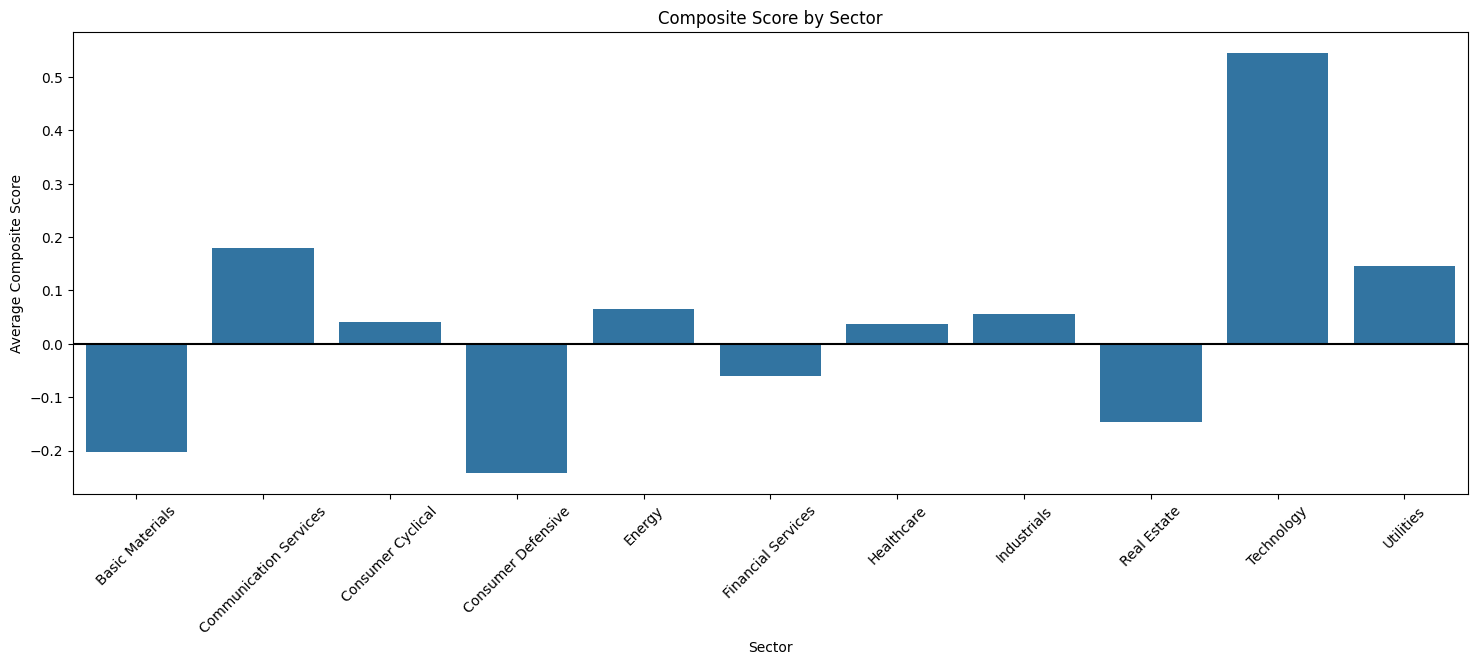

In [ ]:
# Graph composite scores based on groupby sector
stock_score_by_sector = stock_df.groupby('Sector').mean(numeric_only=True)

# Set up plot
plt.figure(figsize=(18,6))
sns.barplot(data = stock_score_by_sector, x = 'Sector', y = 'Composite Score')
plt.title('Composite Score by Sector')
plt.ylabel('Composite Score')
plt.xlabel('Sector')
plt.xticks(rotation=45)
plt.ylabel('Average Composite Score')
plt.axhline(0, color='black');

Type EXIT to Stop
Please Enter a Valid Ticker in the S&P 500: AMD


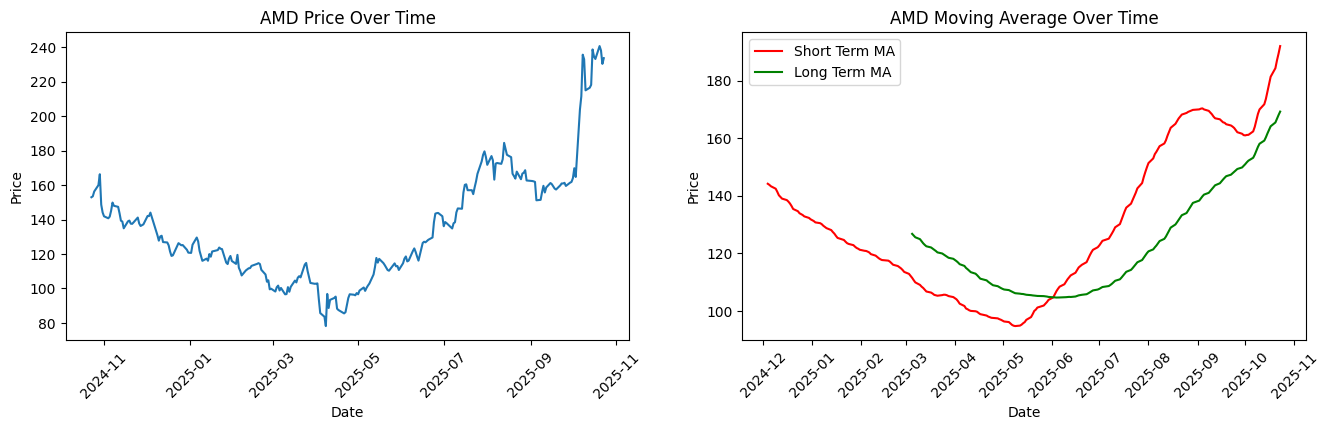



Type EXIT to Stop
Please Enter a Valid Ticker in the S&P 500: NVDA


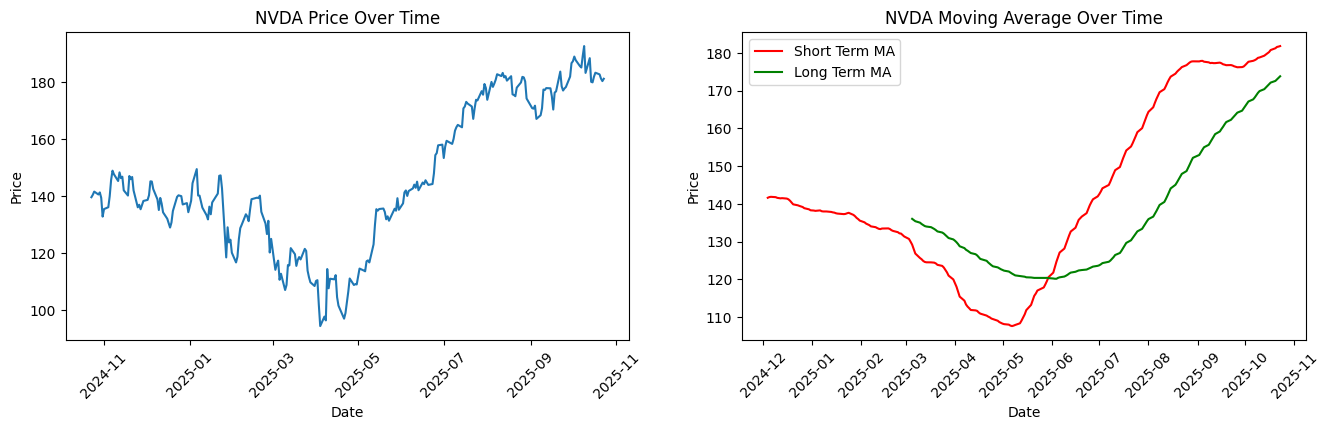



Type EXIT to Stop
Please Enter a Valid Ticker in the S&P 500: ALGN


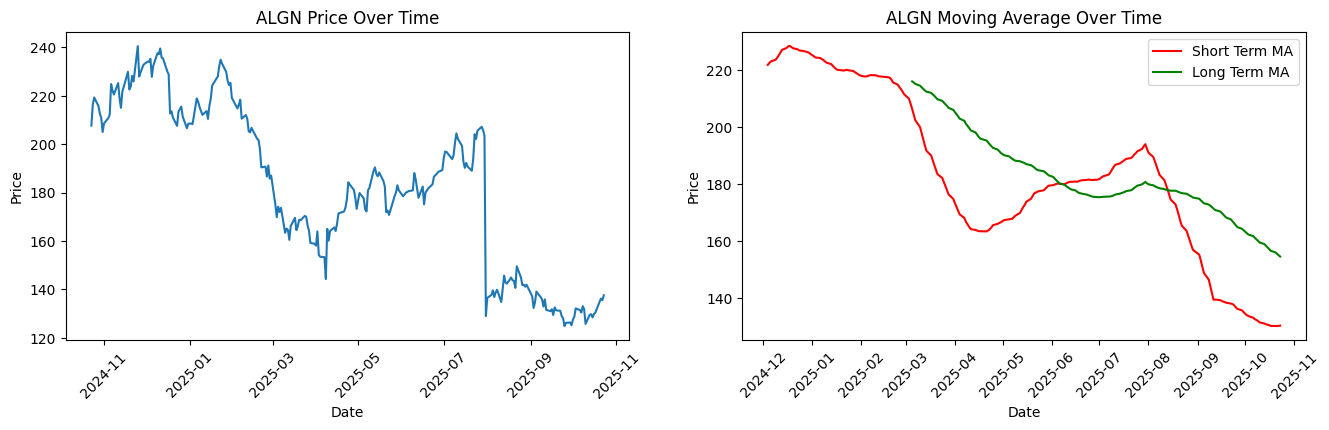



Type EXIT to Stop
Please Enter a Valid Ticker in the S&P 500: EXIT


In [ ]:
# User-Input Look Up Graph for Moving Averages and Prices

# Preventing code from pausing when plot is rendered
plt.ion()

# Initialize user input
user_input = ''

# While loop to allow user to type in input
while user_input != 'EXIT':
  print('Type EXIT to Stop')

  # Prompt User
  user_input = input('Please Enter a Valid Ticker in the S&P 500: ')

  # End on EXIT, if invalid ticker give error message and clear output, if valid ticker display valid ticker price graph
  if user_input == 'EXIT':
    break
  elif user_input not in tickers:
    print('Invalid Ticker')
    continue
  else:
    # Set up Plots
    fig, ax = plt.subplots(1,2, figsize=(16,4))

    # Plot Price
    sns.lineplot(data = stock_df.loc[user_input]['Prices'], ax=ax[0])
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Price')
    ax[0].set_title(f'{user_input} Price Over Time')
    ax[0].tick_params(axis='x', labelrotation=45)

    # Plot Moving Averages
    sns.lineplot(data = stock_df.loc[user_input]['Short Term MA'], ax=ax[1], color='Red', label='Short Term MA')
    sns.lineplot(data = stock_df.loc[user_input]['Long Term MA'], ax=ax[1], color='Green', label='Long Term MA')
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Price')
    ax[1].set_title(f'{user_input} Moving Average Over Time')
    ax[1].tick_params(axis='x', labelrotation=45)
    ax[1].legend()

    # Show plot, pause to render, close fig window so loop can restart, whitespace between plot and next input query
    plt.draw()
    plt.pause(0.001)
    plt.close(fig)
    print('\n')